### Camera Calibration using OpenCV
For more details, see https://docs.opencv.org/4.x/dc/dbb/tutorial_py_calibration.html

In [14]:
import numpy as np
import cv2 as cv
import glob
import yaml

import matplotlib.pyplot as plt

In [15]:
# termination criteria; CHANGE the second number to size of each square
criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 30, 0.001)

# define checkerboard dimensions
CHECKERBOARD = (7, 5)  # number of inner corners per row and column;  ADJUST based on checkerboard's number of INNER squares
square_size = 25.0  # mm per square; CHANGE to your square side length

# prepare object points, like (0,0,0), (1,0,0), (2,0,0) ....,(6,5,0)
objp = np.zeros((CHECKERBOARD[0]*CHECKERBOARD[1],3), np.float32) # adjust based on checkerboard's number of INNER squares
objp[:,:2] = np.mgrid[0:CHECKERBOARD[0], 0:CHECKERBOARD[1]].T.reshape(-1,2) * square_size

# Arrays to store object points and image points from all the images.
objpoints = [] # 3d point in real world space
imgpoints = [] # 2d points in image plane.

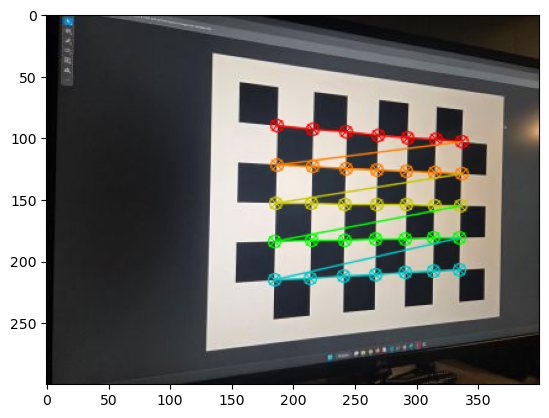

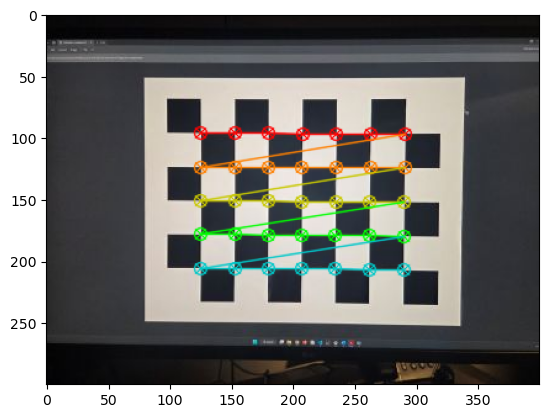

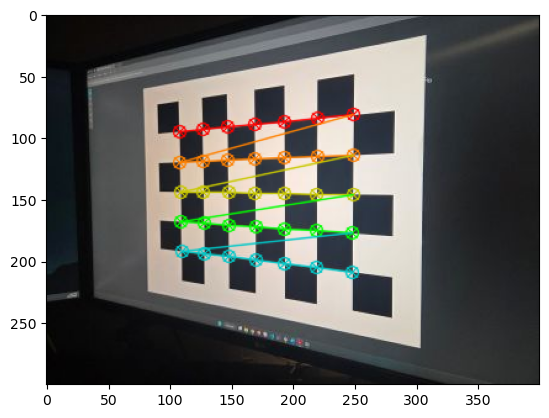

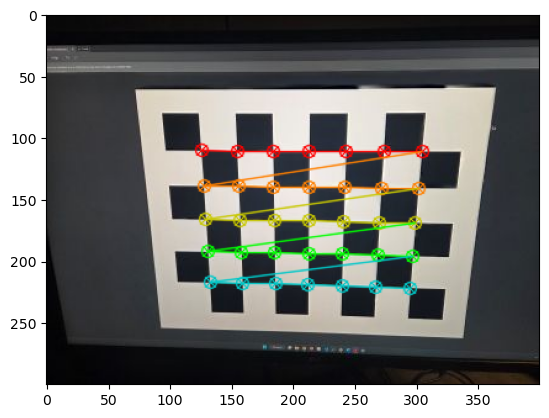

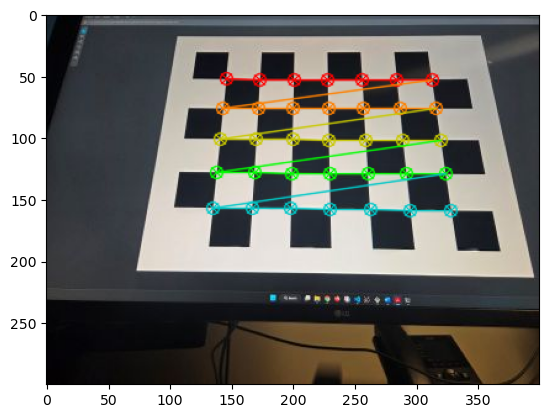

Number of images used for calibration:  5


In [16]:
images = glob.glob(r'data/calib*.jpg')

counter = 0
for fname in images:  
    img = cv.imread(fname) # Capture frame-by-frame
    gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
    
    # Find the chess board corners
    ret, corners = cv.findChessboardCorners(gray, (CHECKERBOARD[0],CHECKERBOARD[1]), None)

    # If found, add object points, image points (after refining them)
    if ret == True:
        objpoints.append(objp)  

        corners2 = cv.cornerSubPix(gray,corners,(11,11),(-1,-1),criteria)
        imgpoints.append(corners2)

        # Draw and display the corners
        counter += 1
        img = cv.drawChessboardCorners(img, (CHECKERBOARD[0],CHECKERBOARD[1]), corners2, ret)
        
        # cv.imshow('img', img)
        # cv.waitKey(1000)
        plt.imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
        plt.show()


print("Number of images used for calibration: ", counter)

cv.destroyAllWindows()


In [17]:
# calibration
ret, mtx, dist, rvecs, tvecs = cv.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)

print(mtx)
print(dist)

# transform the matrix and distortion coefficients to writable lists
data = {'camera_matrix': np.asarray(mtx).tolist(),
        'dist_coeff': np.asarray(dist).tolist()}

# save it to a yaml file
# with open("calibration_matrix.yaml", "w") as f:
#     yaml.dump(data, f)

[[272.08126215   0.         201.75636855]
 [  0.         272.33653962 148.79186761]
 [  0.           0.           1.        ]]
[[ 0.10872978 -0.2816183   0.00058146  0.0007341   0.30749752]]
